In [ ]:
from sklearn.datasets import fetch_openml

data = fetch_openml("mnist_784", version=1)
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
print(data["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
X, y = data["data"], data["target"]

In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
import numpy as np

# most algorithms prefer numbers
y = y.astype(np.uint8)

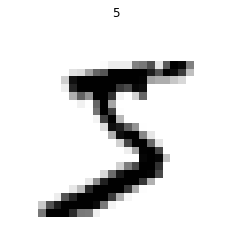

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl


digit = np.array(X.iloc[0])
digit_img = digit.reshape(28, 28)

plt.imshow(digit_img, cmap="binary")
plt.axis("off")
plt.title(y[0])
plt.show()

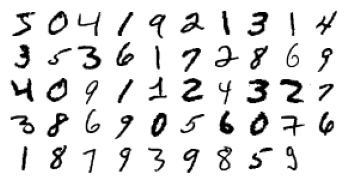

In [ ]:
import math

def plot_digits(instances, images_per_row=10, **kwargs):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = math.ceil(len(instances) / images_per_row)
    
    # append empty to the end if needed
    n_empty = n_rows * images_per_row - len(instances)
    all_instances = np.concatenate([instances, np.zeros((n_empty, size*size))], axis=0)
    
    # reshape it to grid containing 28x28 images
    all_instances = all_instances.reshape(n_rows, images_per_row, size, size)

    # combine axes 0 and 2 (vertical image grid axis and vertical image axis)
    # and 1 and 3 (horizontal). Then reshape to create one big image
    big_image = all_instances.transpose((0, 2, 1, 3)).reshape(n_rows * size, images_per_row * size)
    
    plt.imshow(big_image, cmap="binary", **kwargs)
    plt.axis("off")
    plt.show()
    

plot_digits(X.iloc[:49])

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
# BINARY CLASSIFIER

# lets distinguish between 5 and non 5
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, n_jobs=-1)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(n_jobs=-1, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score 

# note that 90% of data is non5, so if we'll have classifier
# that allways says that it's no 5 it will have 90% accuracy,
# so accuracy scoring isn't best performance meassure
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy", n_jobs=-1)

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [ ]:
def get_conf_matrix(model, data, data_labels, cv=5):
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix
    
    pred = cross_val_predict(model, data, data_labels, cv=cv, n_jobs=-1)
    return confusion_matrix(data_labels, pred)

# rows - accual classes, columns - predicted classes,
# so main diagonal shows how many have been guessed correctly

def get_prec_rec(model, data, data_labels):
    from sklearn.metrics import precision_score, recall_score
    pred = model.predict(data)
    return (precision_score(data_labels, pred), 
            recall_score(data_labels, pred))

def get_f1_score(model, data, data_labels):
    from sklearn.metrics import f1_score
    pred = model.predict(data)
    return f1_score(data_labels, pred)

In [ ]:
get_conf_matrix(sgd_clf, X_train, y_train_5)

array([[53115,  1464],
       [  916,  4505]])

In [ ]:
get_prec_rec(sgd_clf, X_train, y_train_5)

# so here out of data it classified as 5 it is 68 % correct
# 88 % of 5's were classified correctly

(0.6805026118876183, 0.8891348459693783)

In [ ]:
get_f1_score(sgd_clf, X_train, y_train_5)

0.7709532949456175

In [ ]:
y_scores = sgd_clf.decision_function([X_train.iloc[0]])

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# default threshold is 0, here if we'll set threshold
# to 8000 it will return False (instead of previous True
y_scores > 8000

# !!! increasing threshold decreases recall

array([False])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5,
                            method="decision_function", n_jobs=-1)

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(model, data, data_labels, cv=5):
    from sklearn.metrics import precision_recall_curve
    from sklearn.model_selection import cross_val_predict
    
    scores = y_scores = cross_val_predict(model, data, data_labels, 
                                          cv=cv, method="decision_function", n_jobs=-1)
    precisions, recalls, thresholds = precision_recall_curve(data_labels, scores)
    
    plt.figure(figsize=(10, 4))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend()
    plt.grid(True)
    plt.xlabel("Threshold")
    plt.show()

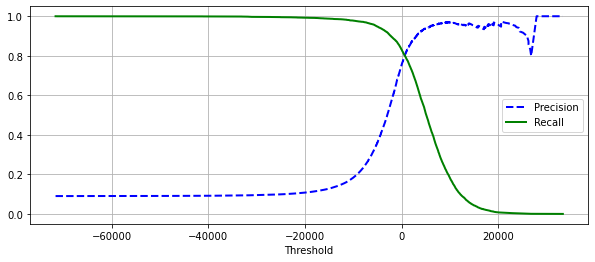

In [ ]:
plot_precision_recall_vs_threshold(sgd_clf, X_train, y_train_5)

In [ ]:
def plot_precision_vs_recall(model, data, data_labels, cv=5):
    from sklearn.metrics import precision_recall_curve
    from sklearn.model_selection import cross_val_predict
    
    scores = cross_val_predict(model, data, data_labels, 
                            cv=cv, method="decision_function", n_jobs=-1)
    precisions, recalls, _ = precision_recall_curve(data_labels, scores)
    
    plt.figure(figsize=(8, 6))
    plt.plot(precisions, recalls, "b-", linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    plt.show()

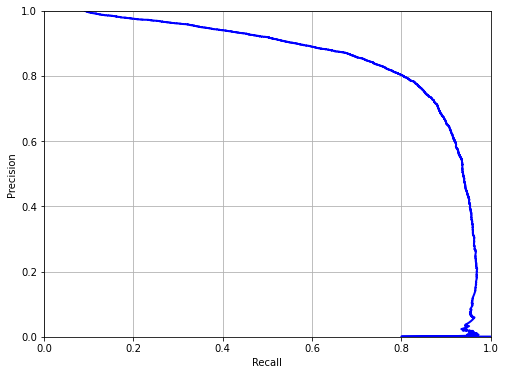

In [ ]:
plot_precision_vs_recall(sgd_clf, X_train, y_train_5)

In [ ]:
# get lowest threshold that gives 90% precision
threshold_90_prec = thresholds[np.argmax(precisions >= 0.90)]

In [ ]:
threshold_90_prec

3045.9258227053647

In [ ]:
from sklearn.metrics import precision_score, recall_score
y_train_pred_90 = (y_scores >= threshold_90_prec)
precision_score(y_train_5, y_train_pred_90)

0.9002016129032258

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.6589190186312488

In [ ]:
def plot_roc_curve(model, data, data_labels, cv=5, scores=None):
    from sklearn.metrics import roc_curve
    from sklearn.model_selection import cross_val_predict
    
    if scores is None:
        scores = cross_val_predict(model, data, data_labels, 
                            cv=cv, method="decision_function",
                                  n_jobs=-1)
    fpr, tpr, _ = roc_curve(data_labels, scores)
    
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], "k--") # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (Fall-Out)")
    plt.ylabel("True Positive Rate (Recall)")
    plt.grid(True)
    plt.show()

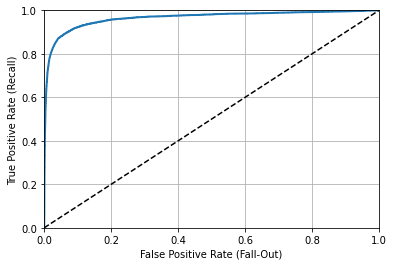

In [ ]:
plot_roc_curve(sgd_clf, X_train, y_train_5)

# dashed line is for random classifier, we want
# to stay as far as possibleb

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9648211175804801

In [ ]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, 
                             cv=5, method="predict_proba", n_jobs=-1)

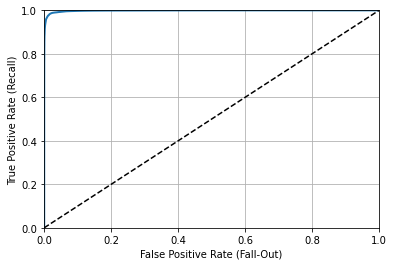

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
plot_roc_curve(forest_clf, X_train, y_train_5, scores=y_scores_forest)

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [ ]:
# some digit scores
some_scores = svm_clf.decision_function([X_train.iloc[0]])
some_scores

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
np.argmax(some_scores)

5

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(), n_jobs=-1)
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(), n_jobs=-1)

In [ ]:
ovr_clf.predict([X_train.iloc[0]])

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.w

array([5], dtype=uint8)

In [ ]:
# OvR will here indeed use 10 estimators
len(ovr_clf.estimators_)

10

In [ ]:
# train SGDClassfier, which can handle multiple classes itselg
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.decision_function([X_train.iloc[0]])

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
sgd_clf.predict([X_train.iloc[0]])

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [ ]:
y_train[0]

5

In [ ]:
# here random classifier'd have 10%
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)

array([0.88083333, 0.88325   , 0.88116667, 0.86625   , 0.8875    ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [ ]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=5, scoring="accuracy", n_jobs=-1)

array([0.89733333, 0.88725   , 0.89583333, 0.89233333, 0.90516667])

In [ ]:
conf_mat = get_conf_matrix(sgd_clf, X_train_scaled, y_train)

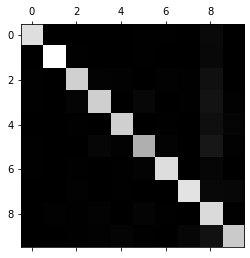

In [ ]:
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

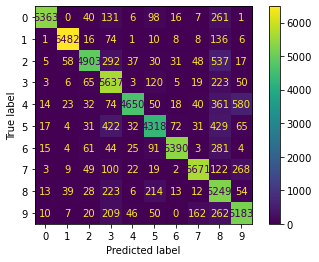

In [ ]:
# or using sklearn

from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_predictionr(y_test, y_train)
ConfusionMatrixDisplay.from_estimator(sgd_clf, X_train, y_train)

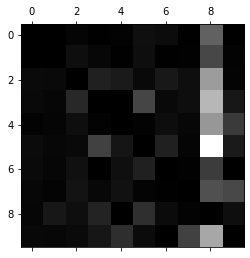

In [ ]:
# error rates

row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums
np.fill_diagonal(norm_conf_mat, 0) 

plt.matshow(norm_conf_mat, cmap=plt.cm.gray)
plt.show()

In [ ]:
# MULTILABEL CLASSIFICATION
from sklearn.neighbors import KNeighborsClassifier

y_train_large = y_train >= 7
y_train_odd = y_train % 2 == 1

y_multilabel = np.c_[y_train_large, y_train_odd]

In [ ]:
knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn_clf.predict([X_train.iloc[0]])

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [ ]:
y_multilabel[0]

array([False,  True])

In [ ]:
from sklearn.metrics import f1_score

# measure performance as average of all f1 (for each label)

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=5, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

# macro - assumes all labels are equaly important
# weighted - number of label instances - label weight

0.977511478985599

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9788245246428662

# MNIST NOISE REMOVAL 

In [ ]:
# create a noise mnist

noise = np.random.randint(0, 100, (len(X_train), 28*28))
X_train_n = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 28*28))
X_test_n = X_test + noise

y_train_n = X_train
y_test_n = X_test

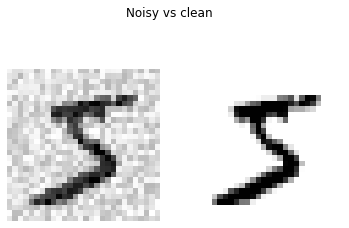

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Noisy vs clean")

f1 = np.array(X_train_n.iloc[0]).reshape(28, 28)
f2 = np.array(X_train.iloc[0]).reshape(28, 28)

ax1.imshow(f1, cmap="binary")
ax2.imshow(f2, cmap="binary")

ax1.axis("off")
ax2.axis("off")

plt.show()

In [ ]:
knn_clf.fit(X_train_n, y_train_n)

KNeighborsClassifier(n_jobs=-1)

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


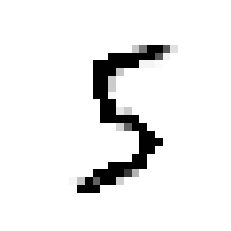

In [ ]:
clean_digit = knn_clf.predict([X_train_n.iloc[0]]).reshape(28, 28)
plt.imshow(clean_digit, cmap="binary")
plt.axis("off")
plt.show()

# Exerices

In [ ]:
X = data["data"]
y = data["target"]

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal

knn_clf = KNeighborsClassifier(n_jobs=-1)
# param_grid = [
#     {"weights": ["uniform", "distance"], "n_neighbors": [1, 2, 3, 5, 8, 10, 15]},
# ]
param_grid = [
    {"weights": ["uniform"], "n_neighbors": [3]}
]

rand_search = GridSearchCV(knn_clf, param_grid=param_grid, n_jobs=-1, cv=5)
rand_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid=[{'n_neighbors': [3], 'weights': ['uniform']}])

In [ ]:
rand_search.best_score_

0.9427833333333332

In [79]:
# scaling does't work well
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal

knn_clf = KNeighborsClassifier(n_jobs=-1)
param_grid = [
    {"weights": ["uniform", "distance"], "n_neighbors": [1, 2, 3, 5, 8, 10, 15]},
]

rand_search = GridSearchCV(knn_clf, param_grid=param_grid, n_jobs=-1, cv=5)
rand_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 5, 8, 10, 15],
                          'weights': ['uniform', 'distance']}])

In [ ]:
rand_search.best_score_

0.9711166666666665

In [78]:
from scipy.ndimage import shift
def shift_image(image, dx, dy, new=0):
    return shift(image.reshape(28, 28), [dx, dy], cval=new).reshape(784)


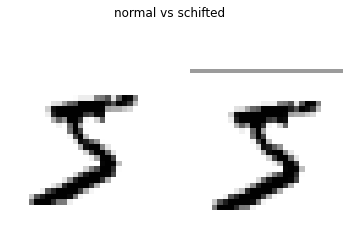

In [80]:
import numpy as np
import matplotlib.pyplot as plt

image = np.array(X_train.iloc[0])

image_shifted = shift_image(image, 1, 0, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image.reshape(28, 28), cmap="binary")
ax2.imshow(image_shifted.reshape(28, 28), cmap="binary")
ax1.axis("off")
ax2.axis("off")
plt.suptitle("normal vs schifted")
plt.show()


In [81]:
X_train = X_train.values
y_train = y_train.values

In [82]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((0, 1), (0, -1), (-1, 0), (1, 0), (-1, 1), (-1, -1), (1, 1), (1, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [84]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [86]:
knn_clf = KNeighborsClassifier(**rand_search.best_params_)

In [87]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [91]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_train_augmented)
accuracy_score(y_train_augmented, y_pred, n_jobs=-1)

KeyboardInterrupt: 